In [25]:
#Necessary imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Data loading
train = pd.read_csv('../Data/train.csv').drop(columns=['id'])
test = pd.read_csv('../Data/test.csv').drop(columns=['id']) 

In [3]:
# Gather / print data shape
print(train.shape)
print(test.shape)

(58645, 12)
(39098, 11)


For a more detailed analysis, it makes sense to start with a scatter matrix between just the features to find patterns between different columns.

In [4]:
# Concatenate the train and test sets, getting rid of the target
features = pd.concat([train.drop(columns=['loan_status']),test],axis=0)

In [5]:
# Turn the categorical values into numerical values in order for them to be represented
features['person_home_ownership'] = features['person_home_ownership'].replace(['RENT','MORTGAGE','OWN','OTHER'],[0, 1, 2, 3])
features['loan_intent']=features['loan_intent'].replace(['EDUCATION','MEDICAL','PERSONAL','VENTURE','DEBTCONSOLIDATION','HOMEIMPROVEMENT'],[0, 1, 2, 3, 4, 5])
features['loan_grade']=features['loan_grade'].replace(['A','B','C','D','E','F','G'],[0, 1, 2, 3, 4, 5, 6])
features['cb_person_default_on_file']=features['cb_person_default_on_file'].replace(['N','Y'],[0, 1])

C:\Users\bmate\AppData\Local\Temp\ipykernel_19556\809461247.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  features['person_home_ownership'] = features['person_home_ownership'].replace(['RENT','MORTGAGE','OWN','OTHER'],[0, 1, 2, 3])
C:\Users\bmate\AppData\Local\Temp\ipykernel_19556\809461247.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  features['loan_intent']=features['loan_intent'].replace(['EDUCATION','MEDICAL','PERSONAL','VENTURE','DEBTCONSOLIDATION','HOMEIMPROVEMENT'],[0, 1, 2, 3, 4, 5])
C:\Users\bmate\AppData\Loca

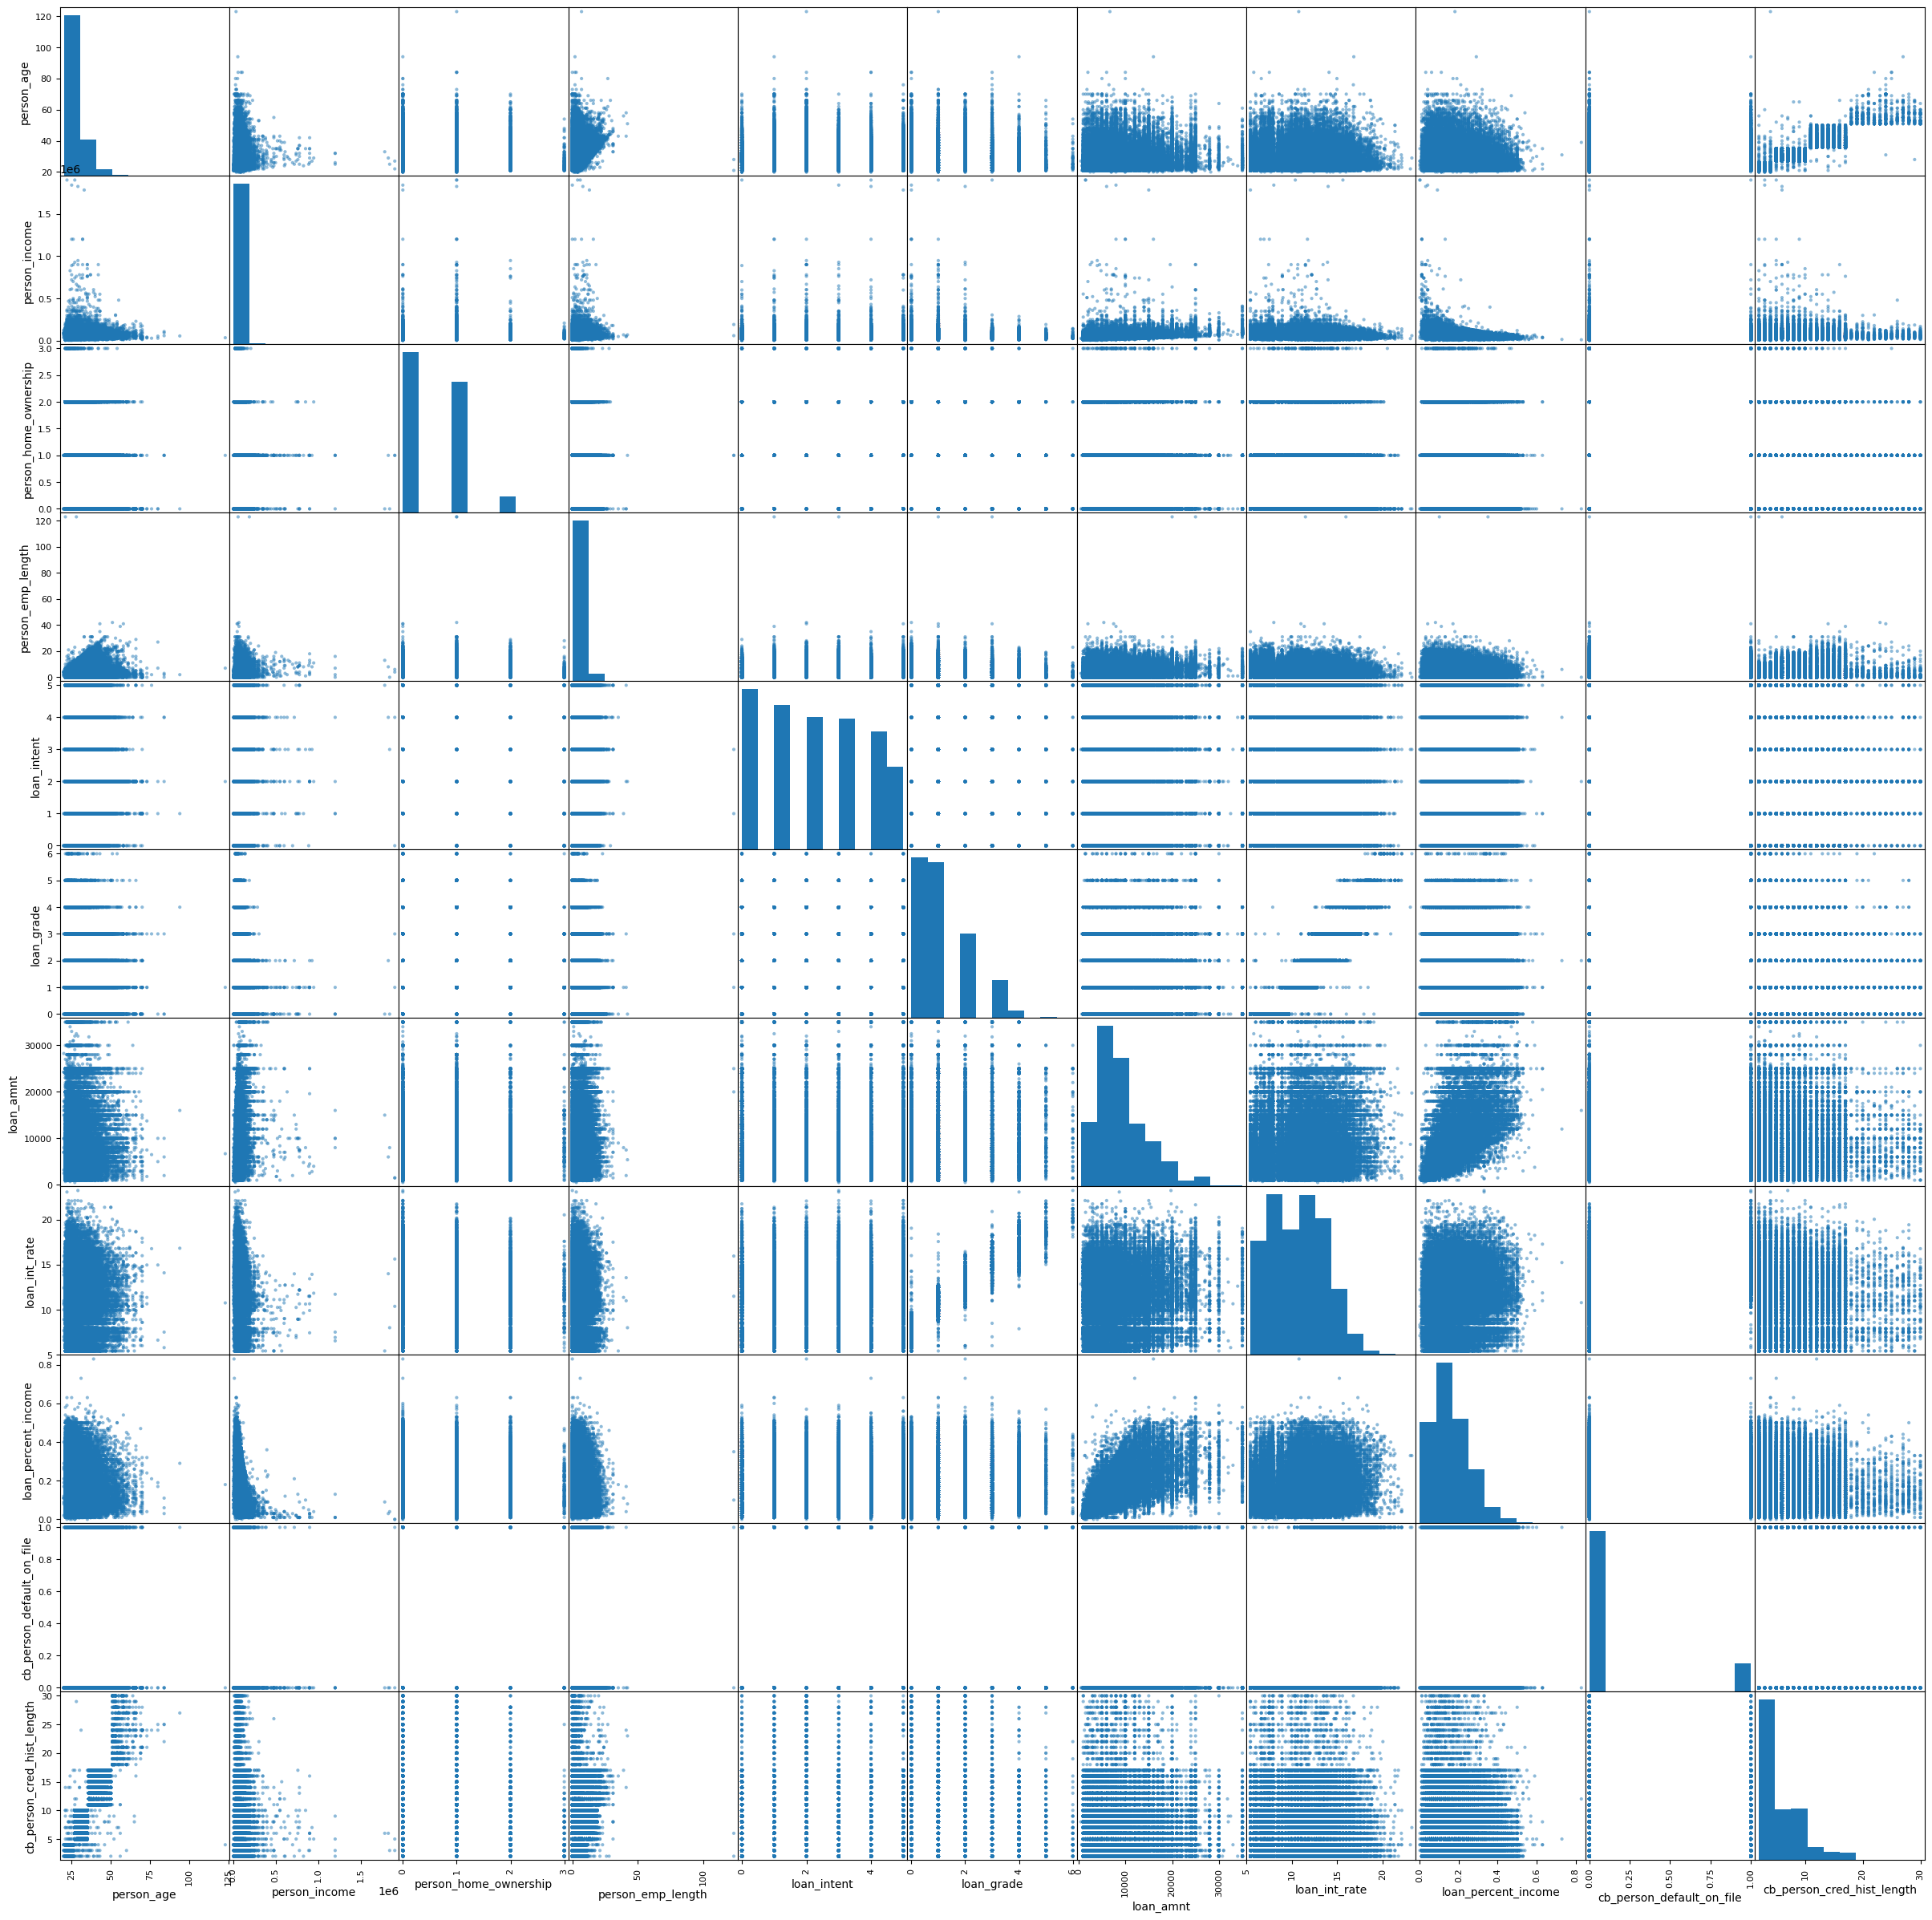

In [6]:
# Create and print scatter matrix
_ = pd.plotting.scatter_matrix(features, figsize=[30,30], diagonal='hist')

The plot seems relatively scattered, but a few of the features can have genuine conclusions drawn.

#### Person Age

The time it takes for a person to pay a loan incresaes during the middle age.

Credit history length very obviously scales up with age.

Income trends down with increasing age, and the highest value loans are primarily asked for by younger people.

#### Person Income

The higher a person's income, the lower the amount of loans across the board are.

Every other feature is relatively disconnected from income.

#### Person Home Ownership

No meaningful conclusions can be drawn

#### Estimated Payment Length

No meaningful conclusions can be drawn



#### Loan Intent

No meaningful conclusions can be drawn

#### Loan Grade

No meaningful conclusions can be drawn

#### Loan Amount

The loan's percent income trended up with the amount of the loan.

The loan's percent income trended heavily down with the person's income.

#### Loan Interest Rate

The loan's interest rate trended up with the loan's grade

#### Loan Percent Income

Again, the loan's percent income trended up with the amount of the loan.

#### Person Default on File

No meaningful conclusions can be drawn

#### Person Credit History Length

Obviously, credit history length scales upward with age

#### Results

Not many meaningful connections were found through just the features, so next we'll compare each feature individually to the target

In [28]:
# Perform the same numeric conversions on the training set
train_numeric = train
train_numeric['person_home_ownership'] = train_numeric['person_home_ownership'].replace(['RENT','MORTGAGE','OWN','OTHER'],[0, 1, 2, 3])
train_numeric['loan_intent']=train_numeric['loan_intent'].replace(['EDUCATION','MEDICAL','PERSONAL','VENTURE','DEBTCONSOLIDATION','HOMEIMPROVEMENT'],[0, 1, 2, 3, 4, 5])
train_numeric['loan_grade']=train_numeric['loan_grade'].replace(['A','B','C','D','E','F','G'],[0, 1, 2, 3, 4, 5, 6])
train_numeric['cb_person_default_on_file']=train_numeric['cb_person_default_on_file'].replace(['N','Y'],[0, 1])

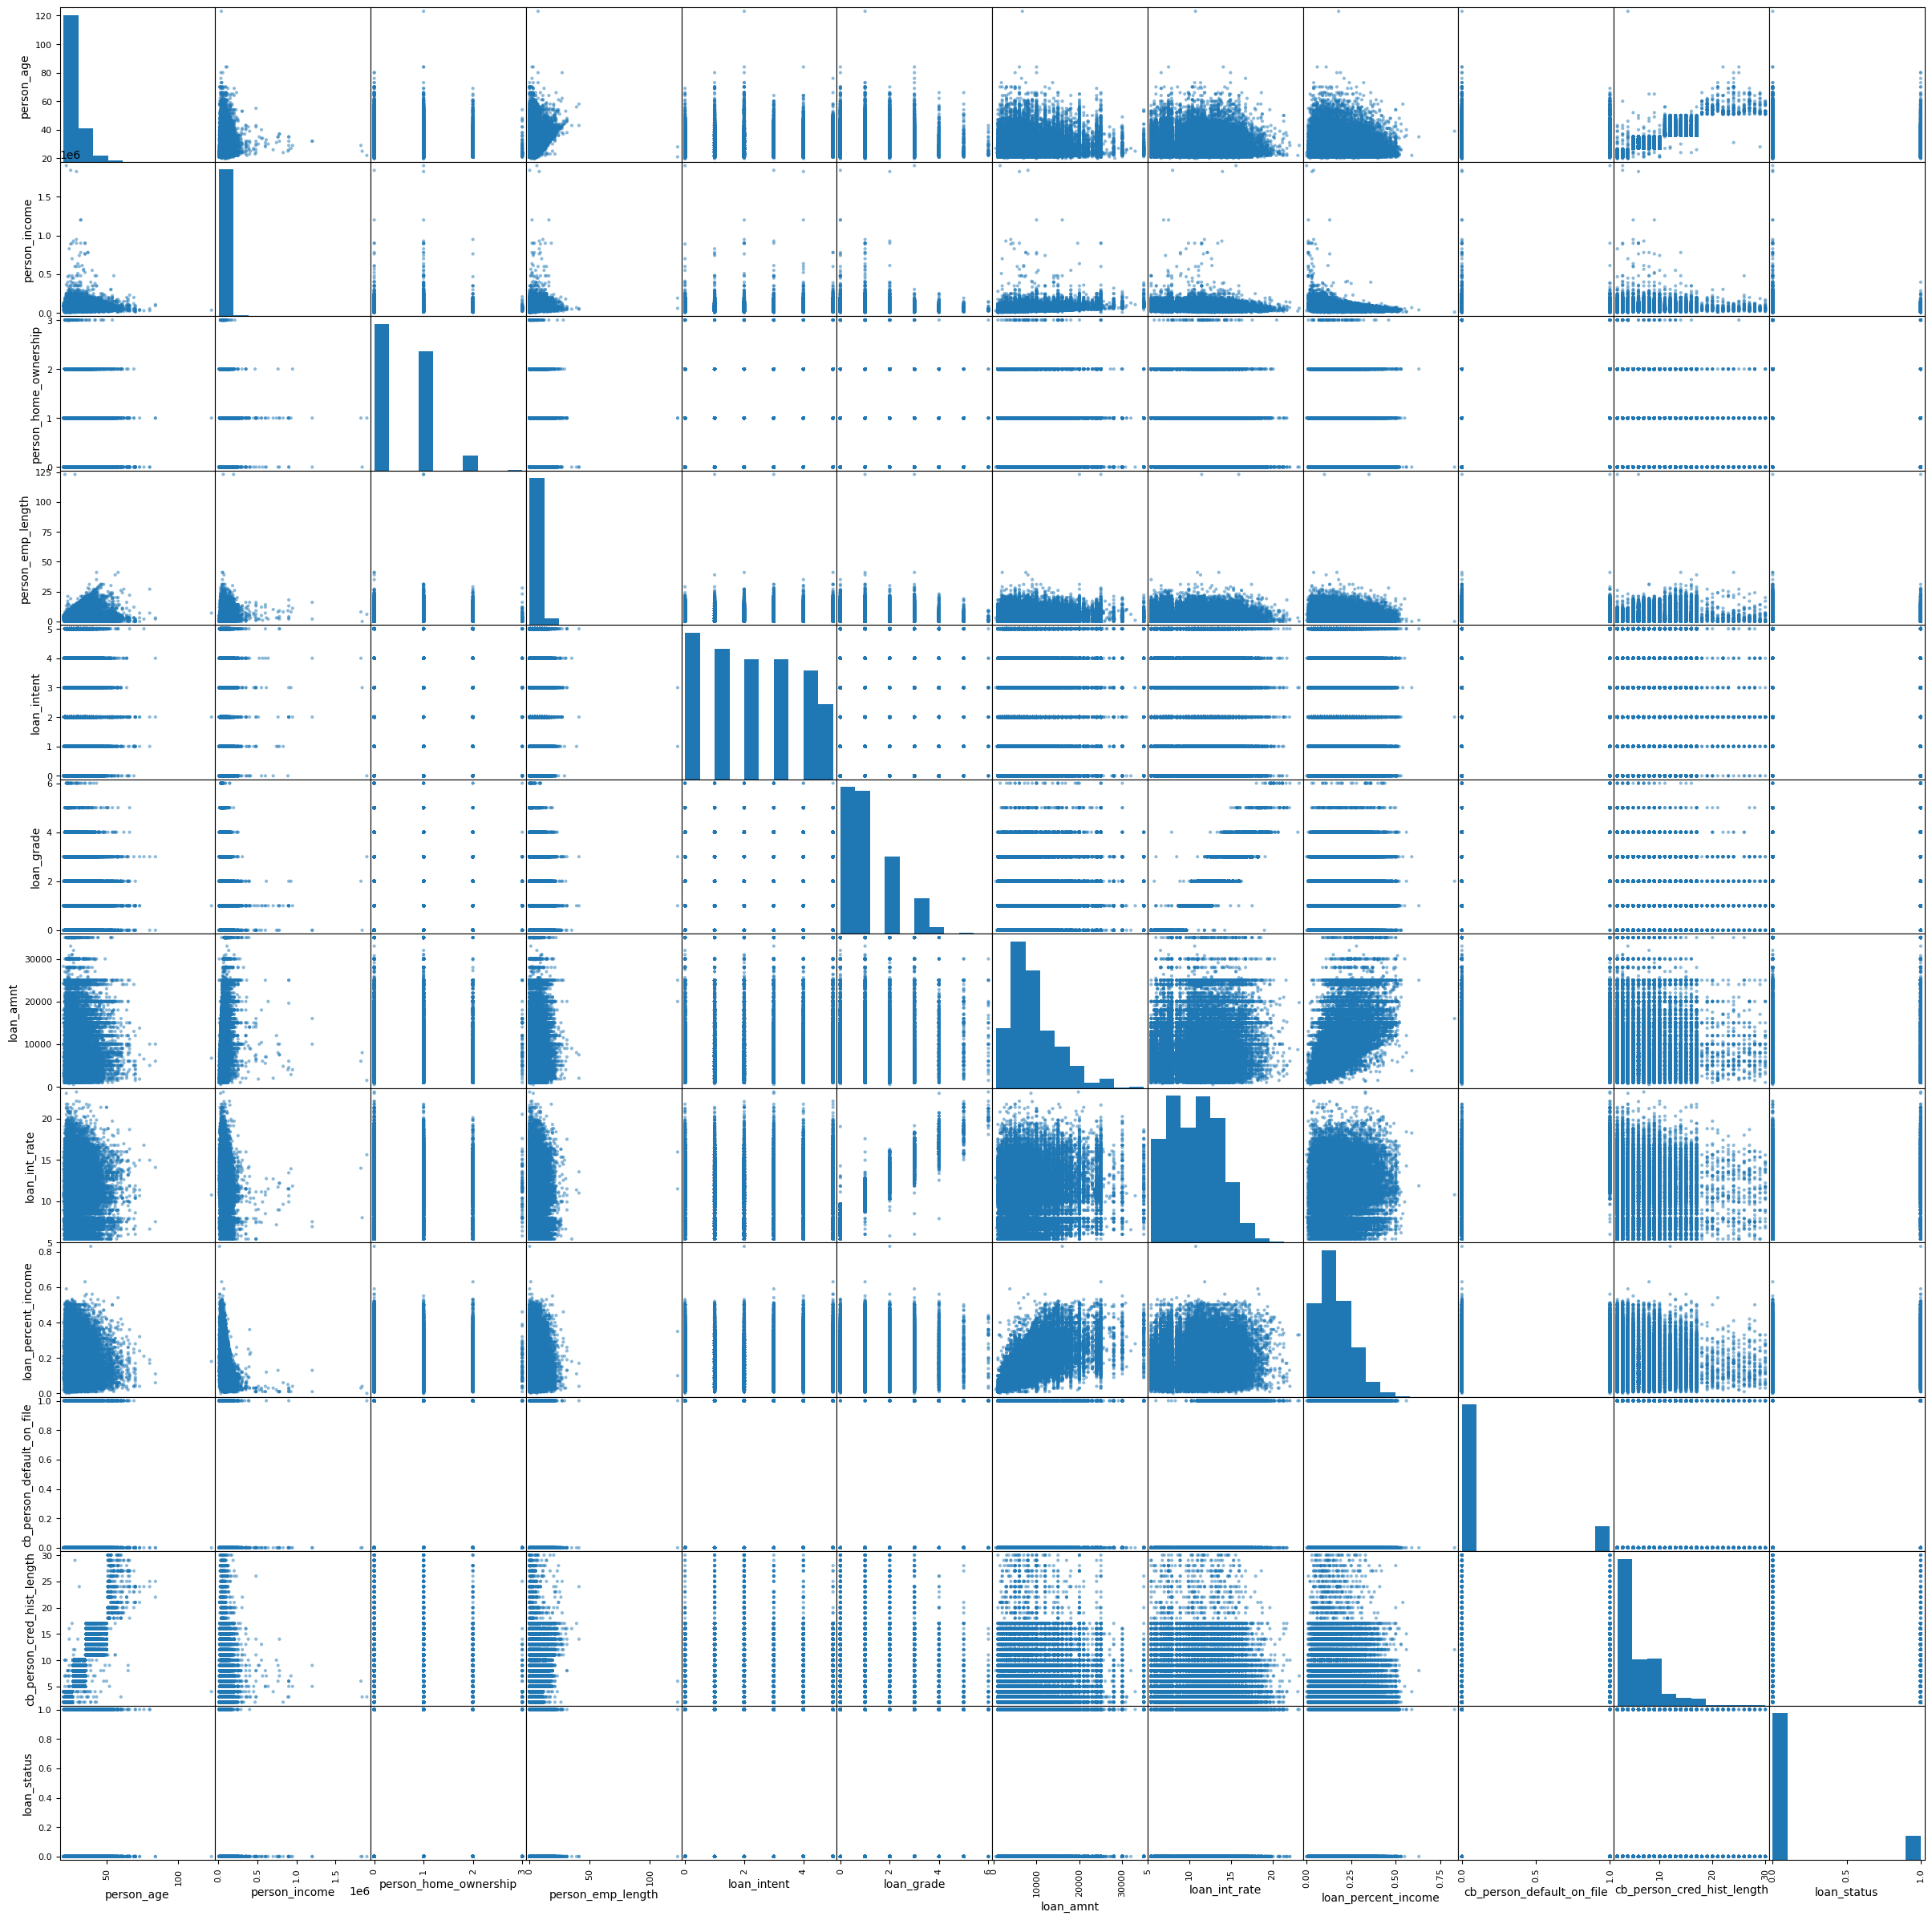

In [29]:
# Create and print scatter matrix
_ = pd.plotting.scatter_matrix(train_numeric, figsize=[30,30], diagonal='hist')

#### Results

Looking at this, we're able to gather a couple pieces of information about the target, but not really that much.

We can swee things like a person's age and a person's income have a slight bearing over whether or not a loan is approved, but it seems mostly independant.

Overall, not much at all can be gathered with direct correlations between the features and the target.